#### Ensure gruyere files can be used

In [1]:
import sys
sys.path.append('..')

In [2]:
import kernex as kex
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from gruyere.brushes import notched_square_brush, circular_brush, show_mask
from gruyere.design import _initialize_design, Design
from gruyere.generator import generate_design, _step_generator
from gruyere.states import DesignState

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70

# We generate an initial random design 

In [10]:
## We initalize a random array
# size = 30
size = 30
# size = 15

key = jax.random.PRNGKey(42)
latent_design = jax.random.uniform(key, (size,size)) * 2 - 1

In [11]:
## We define the transform function
beta = 4
def transform(design, brush, beta=1):
    @jax.jit
    @kex.kmap(kernel_size=brush.shape, padding=('same','same'))
    def brush_conv(x):
        return jnp.sum(x * brush)

    return jnp.tanh(beta * brush_conv(design))

# Figure 2. (a)  diameter-13 circular brush

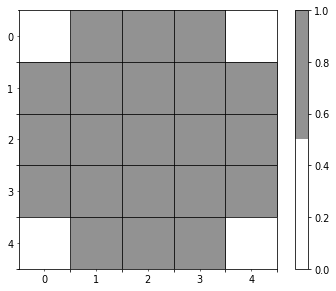

In [12]:
circ_brush = circular_brush(5)
# circ_brush = circular_brush(3)
# circ_brush = circular_brush(13)
show_mask(circ_brush);

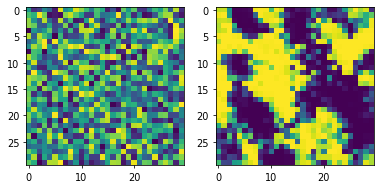

In [13]:
transformed_design1 = transform(latent_design, circ_brush)

fig, ax = plt.subplots(1,2)
ax[0].imshow(latent_design);
ax[1].imshow(transformed_design1);

In [7]:
circ_design = generate_design(transformed_design1, circ_brush)
circ_design.show()

1 / 15625 15604
2 / 15625 15597
3 / 15625 15592
4 / 15625 15588
5 / 15625 15584
6 / 15625 15583
7 / 15625 15578
8 / 15625 15576
9 / 15625 15555
10 / 15625 15534
11 / 15625 15531
12 / 15625 15530
13 / 15625 15524
14 / 15625 15524
15 / 15625 15519
16 / 15625 15498
17 / 15625 15493
18 / 15625 15472
19 / 15625 15451
20 / 15625 15446
21 / 15625 15441
22 / 15625 15420
23 / 15625 15399
24 / 15625 15378
25 / 15625 15371
26 / 15625 15371
27 / 15625 15350
28 / 15625 15349
29 / 15625 15347
30 / 15625 15343
31 / 15625 15322
32 / 15625 15320
33 / 15625 15319
34 / 15625 15314
35 / 15625 15311
36 / 15625 15307
37 / 15625 15307
38 / 15625 15286
39 / 15625 15276
40 / 15625 15276
41 / 15625 15255
42 / 15625 15234
43 / 15625 15230
44 / 15625 15209
45 / 15625 15188
46 / 15625 15167
47 / 15625 15146
48 / 15625 15141
49 / 15625 15120
50 / 15625 15099
51 / 15625 15095
52 / 15625 15074
53 / 15625 15071
54 / 15625 15070
55 / 15625 15065
56 / 15625 15044
57 / 15625 15030
58 / 15625 15030
59 / 15625 15019
60 / 1

KeyboardInterrupt: 

# Figure 2. (b) width-13 notched square brush

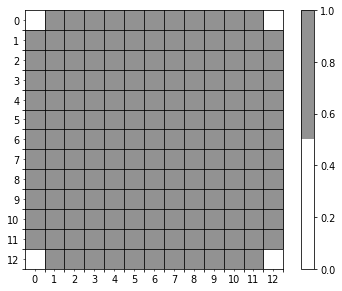

In [ ]:
notch_brush = notched_square_brush(13,1)
show_mask(notch_brush);

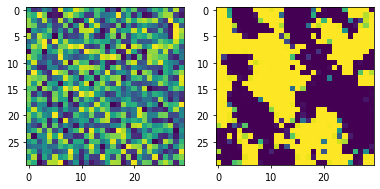

In [ ]:
transformed_design2 = transform(latent_design, notch_brush)

fig, ax = plt.subplots(1,2)
ax[0].imshow(latent_design);
ax[1].imshow(transformed_design1);

In [20]:
notch_design = generate_design(transformed_design2, notch_brush)
notch_design.visualize()

NameError: name 'transformed_design2' is not defined

In [15]:
it = 0
des = _initialize_design(transformed_design1.shape)

@jax.jit
@kex.kmap(kernel_size=circ_brush.shape, padding=('same','same'))
def fun_dilation(x):
    return jnp.sum(x * circ_brush)

Step : 0


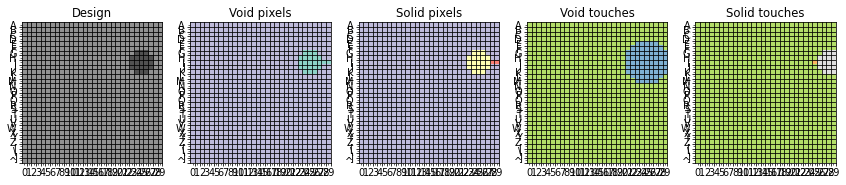

In [16]:
new_des = _step_generator(des, transformed_design1, fun_dilation)
new_des.show()
print('Step :', it)

Step : 1
Step : 2
Step : 3
Step : 4
Step : 5
Step : 6
Step : 7
Step : 8
Step : 9
Step : 10


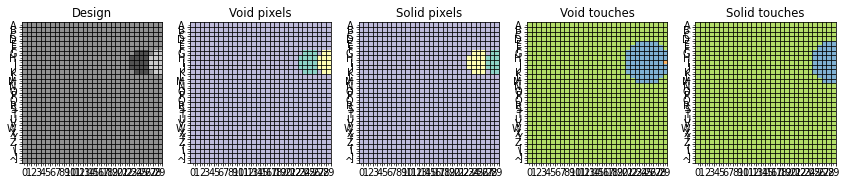

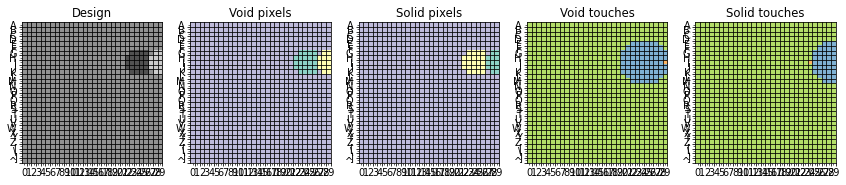

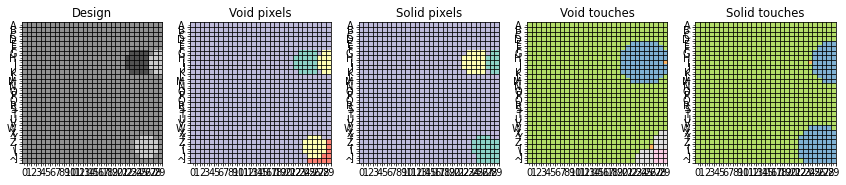

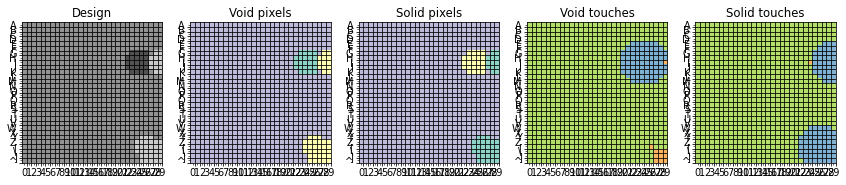

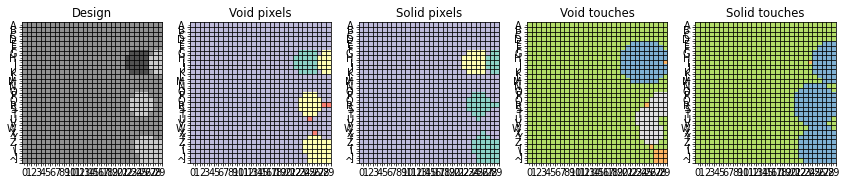

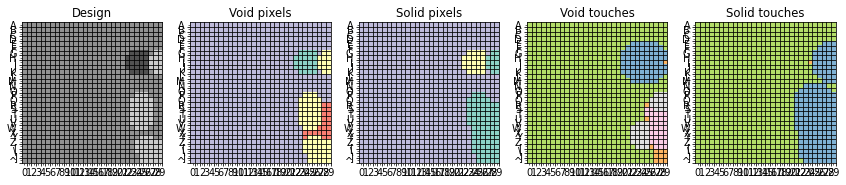

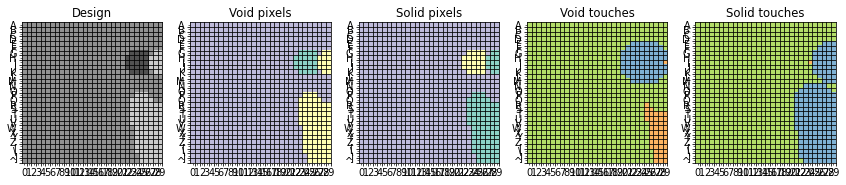

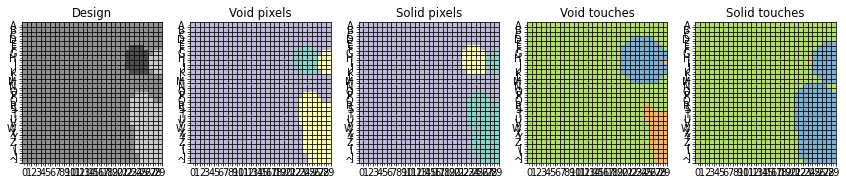

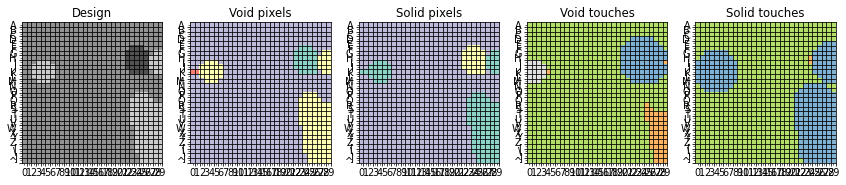

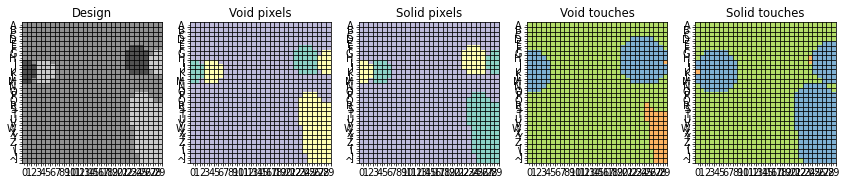

In [17]:
while it < 10:
    new_des = _step_generator(new_des, transformed_design1, fun_dilation)
    it += 1
    new_des.show()
    print('Step :', it)

In [19]:
transformed_design1 *= -1

Step : 10


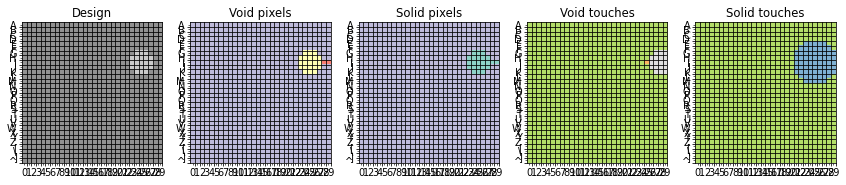

In [20]:
new_des = _step_generator(des, transformed_design1, fun_dilation)
new_des.show()